In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('v2.csv')

In [3]:
df.head()

,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,Ecuador,Developing,75.1,137.0,7,3.87,282.144007,91.0,0,5.0,8,91.0,5.58,94.0,0.1,4255.565710,14691275.0,0.702,13.1
1,Suriname,Developing,70.0,196.0,0,5.13,885.073977,87.0,0,54.1,0,85.0,6.14,87.0,0.6,7443.851780,52619.0,0.696,12.1
2,Togo,Developing,59.7,285.0,13,0.01,4.877350,87.0,577,23.7,20,85.0,5.25,87.0,1.0,62.131849,7228915.0,0.475,12.0
3,United States of America,Developed,79.1,14.0,23,8.82,0.000000,92.0,667,69.1,27,93.0,17.14,95.0,0.1,NaN,NaN,NaN,NaN
4,Philippines,Developing,67.2,217.0,67,4.44,0.901149,52.0,10511,19.2,87,85.0,3.25,84.0,0.1,11.553196,8331954.0,0.631,11.6


In [4]:
df.shape

(1000, 19)

In [5]:
df.describe()

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
count,998.000000,998.000000,1000.000000,935.000000,1000.000000,805.000000,1000.000000,988.000000,1000.000000,994.000000,925.000000,994.000000,1000.000000,850.000000,7.690000e+02,947.000000,947.000000
mean,69.187976,162.061122,31.518000,4.646706,790.778326,81.592547,2700.690000,37.114575,43.612000,83.237425,5.790108,83.324950,1.799900,7740.205569,1.332692e+07,0.624231,11.950053
std,9.697537,121.590402,130.364453,4.019612,2146.407292,24.738944,12188.513379,20.168075,175.756661,22.767133,2.331503,22.709205,5.121504,15235.959630,6.722767e+07,0.216665,3.428032
min,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,3.000000,0.740000,3.000000,0.100000,4.613575,1.230000e+02,0.000000,0.000000
25%,62.925000,72.000000,0.000000,0.985000,4.838161,77.000000,0.000000,18.600000,0.000000,78.000000,4.240000,79.000000,0.100000,452.685183,2.343190e+05,0.487500,9.900000
50%,72.250000,138.000000,3.000000,3.890000,59.339419,93.000000,14.000000,41.300000,4.000000,93.000000,5.700000,93.000000,0.100000,1641.136536,1.381599e+06,0.680000,12.300000
75%,75.975000,228.000000,21.250000,7.875000,429.926278,97.000000,350.500000,55.625000,27.000000,97.000000,7.260000,97.000000,0.800000,5807.797280,6.555829e+06,0.779500,14.300000
max,89.000000,715.000000,1800.000000,16.990000,18961.348600,99.000000,141258.000000,77.600000,2400.000000,99.000000,17.140000,99.000000,50.600000,119172.741800,1.293859e+09,0.948000,20.600000


In [6]:
# Checking any missing values in the column Life Expectancy

df['Life_expectancy'].isnull().sum()

2

There are two missing values in the life expectancy column. Dropping these null values.

In [7]:
pd.DataFrame.dropna?

In [8]:
data = df

In [9]:
data = data.dropna(subset=['Life_expectancy'])

In [10]:
data.shape

(998, 19)

In [11]:
data.head()

,Country,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,Ecuador,Developing,75.1,137.0,7,3.87,282.144007,91.0,0,5.0,8,91.0,5.58,94.0,0.1,4255.565710,14691275.0,0.702,13.1
1,Suriname,Developing,70.0,196.0,0,5.13,885.073977,87.0,0,54.1,0,85.0,6.14,87.0,0.6,7443.851780,52619.0,0.696,12.1
2,Togo,Developing,59.7,285.0,13,0.01,4.877350,87.0,577,23.7,20,85.0,5.25,87.0,1.0,62.131849,7228915.0,0.475,12.0
3,United States of America,Developed,79.1,14.0,23,8.82,0.000000,92.0,667,69.1,27,93.0,17.14,95.0,0.1,NaN,NaN,NaN,NaN
4,Philippines,Developing,67.2,217.0,67,4.44,0.901149,52.0,10511,19.2,87,85.0,3.25,84.0,0.1,11.553196,8331954.0,0.631,11.6


There are 2 categorical features in the dataset, namely Country and Status.

In [12]:
data['BMI'].mean()

37.125354969574026

Missing values in Hepatitis B and Population?

In [13]:
data.isnull().sum()

Country                              0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                             65
percentage_expenditure               0
Hepatitis_B                        195
Measles                              0
BMI                                 12
under-five_deaths                    0
Polio                                6
Total_expenditure                   75
Diphtheria                           6
HIV_AIDS                             0
GDP                                149
Population                         229
Income_composition_of_resources     53
Schooling                           53
dtype: int64

Unique Countries ?

In [14]:
len(data['Country'].unique())

183

y = Life_expectancy

X = other columns

In [15]:
y = data.pop('Life_expectancy')
X= data

In [16]:
X.shape

(998, 18)

Average life expectancy?

In [17]:
y.mean()

69.18797595190381

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [19]:
a = X_train['GDP'].mean()
b= X_test['GDP'].mean()
print(f'Average GDP in Train set: {a:.2f}')
print(f'Average GDP in Test set: {b:.2f}')

Average GDP in Train set: 7677.77
Average GDP in Test set: 8057.68


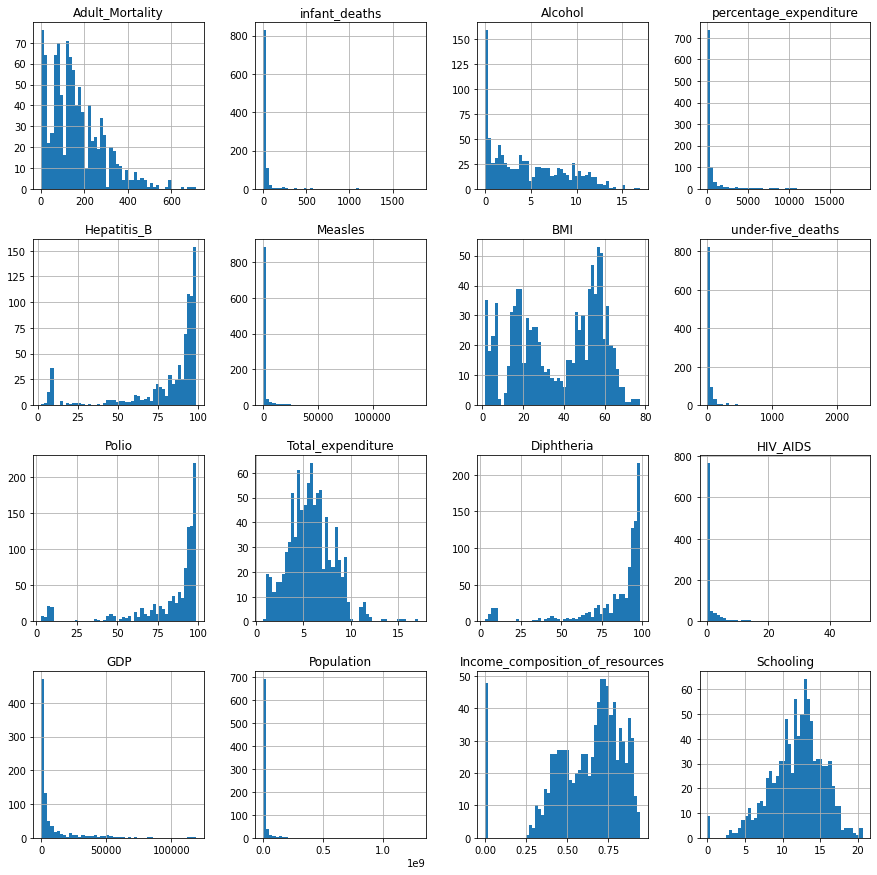

In [20]:
#Histogram for the following cols = ['percentage_expenditure','Measles','under-five_deaths','HIV_AIDS','Schooling']
a = data.hist(bins=50,figsize=(15,15))
plt.show()

Schooling and Total Expenditure has close to normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


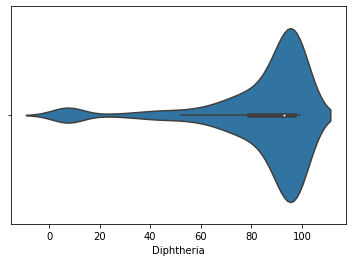

In [21]:
# Violin plot for the feature Diptheria 
sns.violinplot(X_train['Diphtheria'])
plt.show()

Box plot to find features with no outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


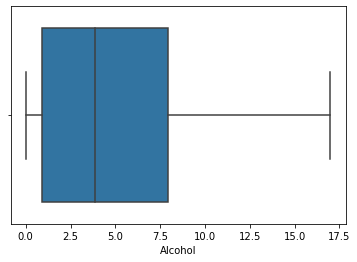

In [22]:
sns.boxplot(X_train['Alcohol'])
plt.show()

No outliers detected in the feature 'Alcohol'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


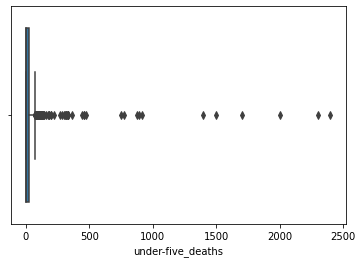

In [23]:
sns.boxplot(X_train['under-five_deaths'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


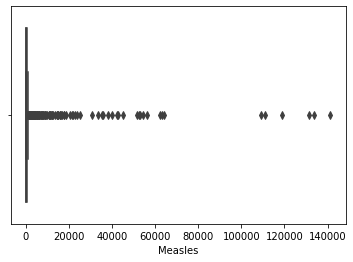

In [24]:
sns.boxplot(X_train['Measles'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


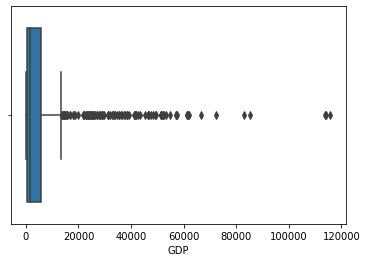

In [25]:
sns.boxplot(X_train['GDP'])
plt.show()

Converting the features to polynomial features

In [63]:
poly = PolynomialFeatures(degree=2)

In [64]:
polydata = poly.fit_transform(X_train.iloc[:,2:4])
#OR X_train[X_train.columns[2:4]]

In [65]:
polydata.shape

(798, 6)

Pipeline for preprocessing of numerical and categorical transformer

In [68]:
numeric_features = ['Adult_Mortality', 'infant_deaths', 'Alcohol',
       'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'Income_composition_of_resources',
       'Schooling']
categ_features = ['Country', 'Status']

In [66]:
numeric_transformer = Pipeline([('imputer',SimpleImputer(strategy='mean')),
                                ('scaler',StandardScaler())])
categorical_transfromer = Pipeline([('encode',OneHotEncoder(handle_unknown='ignore'))])

In [75]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer( transformers = [('num',numeric_transformer,numeric_features),
                                                  ('cat',categorical_transfromer,categ_features)])

In [80]:
preprocessor.fit(X_train)
X_train=preprocessor.transform(X_train)
X_test=preprocessor.transform(X_test)

In [81]:
len(numeric_transformer)

2

In [82]:
X_train.shape

(798, 200)

## RFE

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [85]:
regressor = LinearRegression()

selector = RFE(regressor, n_features_to_select=15, step=1)
selector.fit(X_train,y_train)
selector.support_

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Score on a linear regression model

In [89]:
regressor.fit(X_train,y_train)
regressor.score(X_train,y_train)

0.9597845736723394

Cross validation for 15 splits

In [91]:
from sklearn.model_selection import cross_val_score

In [96]:
cv_score = cross_val_score(regressor,X_train,y_train,cv=15)
print(f'cross_val_score:{cv_score.max():.3f}')

cross_val_score:0.951


Stochastic Gradient Descent regressor 

Model 1

In [99]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [100]:
sgd = SGDRegressor( penalty='l1',alpha=0.001,learning_rate='constant', eta0=0.001,random_state=42 )
sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant', penalty='l1',
             random_state=42)

In [105]:
mse_train = mean_squared_error(y_train,sgd.predict(X_train))
mse_test = mean_squared_error(y_test,sgd.predict(X_test))

print(abs(mse_train-mse_test))

3.7488434076613295


Model 2

In [106]:
sgd2 = SGDRegressor( penalty='l2',alpha=0.01,learning_rate='adaptive', eta0=0.01,random_state=42,loss='huber' )
sgd2.fit(X_train,y_train)

SGDRegressor(alpha=0.01, learning_rate='adaptive', loss='huber',
             random_state=42)

In [110]:
from sklearn.metrics import r2_score
print(r2_score(y_test,sgd2.predict(X_test)))

-45.146378890140234
